## Description

 - In the Telecom Industry, Customers are able to choose from multiple service providers and actively switch from one Operator to another.
 - The Technical Progress and the Increasing Number of Operators Raised the Level of Competition.
 - Three main Strategies have been Proposed to Generate More Revenues: 
     - Acquire New Customers
     - Upsell the Existing Customers
     - Increase the Retention Period of Customers</br>     
 - However, Comparing these Strategies Taking the Value of Return on Investment (RoI) of each into Account has shown that the Increase the Retention Period of Customers, is the most Profitable Strategy.
 - In this highly competitive market, the Telecom Industry experiences an average of 15-25% annual Churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one,So,the Customer Retention has now become even more important than Customer Acquisition.
 - For most of the operators, retaining their customers is primary objective.
 - To reduce Customer Churn, Telecom operators need to predict the customers with higher rate of getting into that category.
 -  In order for a Company to Expand its Services, its Growth Rate (i.e. its number of new customers) must exceed its Churn Rate.

### Customer Churn

 - Churn rate is the Percentage of Subscribers to a Service that Discontinue their Subscription to that Service in a given Time Period.

#### Importance

 - They indicate the Strength of a Company’s Customer Service and its overall Growth.
 - Lower the Churn Rate of a Company, the better it is in it's Competative State.
 - It is always more Difficult and Expensive for a Company to Acquire a New Customer than it is to retain a Current Paying Customer.

So, If we Predict Customers who are at High Risk of Churning, There will be Still Time to Take Necessary Actions for the Company about their Customers to reduce the Churn Rate.

In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting the display options

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Description

 - The Dataset Consists of 7043 Observations and 21 Columns.
 - Each Row Represents a Customer, Each Column Contains Customer’s Attributes Described on the Column Metadata.
 - The Raw Data Contains the Following Columns:
     - customerID:  A unique ID that identifies each customer.
     - Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
     - Country: The country of the customer’s primary residence.
     - State: The state of the customer’s primary residence.
     - City: The city of the customer’s primary residence.
     - Zip Code: The ZIP code of the customer’s primary residence.
     - Lat Long: The latitude and longitude of the customer’s primary
     - Latitude: The latitude of the customer’s primary residence.
     - Longitude: The longitude of the customer’s primary residence.
     - Gender: The customer’s gender: Male, Female.
     - Senior Citizen: Indicates if the customer is 65 or older: Yes, No.
     - Partner: Indicates if the customer has a partner: Yes, No.
     - Dependents: Indicates if the customer lives with any dependents: Yes, No.
     - Tenure: The length of time that the customer has been with the company.
     - Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No.
     - Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No, No phone service.
     - Internet Service: Indicates if the customer subscribes to Internet service with the company: DSL, Fiber optic, No.
     - Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No, No internet service.
     - Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No, No internet service.
     - Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No, No internet service.
     - Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No, No internet service.
     - Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No, No internet service.
     - Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No, No internet service.
     - Contract: Indicates if the customer has a contract with the company: Month-to-month, One year, Two year.
     - Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No.
     - Payment Method: Indicates how the customer pays their bill: Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check.
     - Monthly Charges:  Indicates the customer’s current total monthly charge for all their services from the company.
     - Total Charges:  Indicates the customer’s total charges, calculated to the end of the quarter specified above.
     - Churn Label : Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
     - Churn Value : 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
     - Churn Score: A value from 0-100 that is calculated using the predictive tool. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
     - CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
     - Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [3]:
# loading the dataset

df = pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
# Looking into the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
# converting the Total Charges column to numeric

df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [6]:
# checking summary statistics for numerical columns

df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [7]:
# checking the missing values

data_na = (df.isnull().sum() / len(df)) 
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'mean of nulls' :data_na, "number of nulls" : df[data_na.index].isna().sum()})
missing_data

,mean of nulls,number of nulls
Churn Reason,0.734630,5174
Total Charges,0.001562,11


In [8]:
# Fill the missing values in Total Charges column with the product of Monthly Charges and Tenure Months

df['Total Charges'].fillna(df['Monthly Charges'] * df['Tenure Months'], inplace=True)

#### Problem of Low and High Cardinality:

* Low cordinality/Constant Column: A column that has the same value for every row in a dataset is often considered uninformative and can be a problem in data analysis or machine learning, as it doesn't provide any information.

* High Cardinality: When each row in a dataset has a unique value. High cardinality features can present challenges for modeling, as they can lead to a large number of unique categories, which can make the data more difficult to work with.

In [9]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

The data has many constant features and columns with high cardinality problem.

Low cordinality columns:

    Count column
    Country column
    State column

High cordinality columns:

    CustomerID column.
    Zip Code column

We can drop the columns with low cordinality and high cordinality columns.

In [10]:
# splitting the data into numerical and categorical columns

num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [11]:
print(num_cols)

['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']


In [12]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

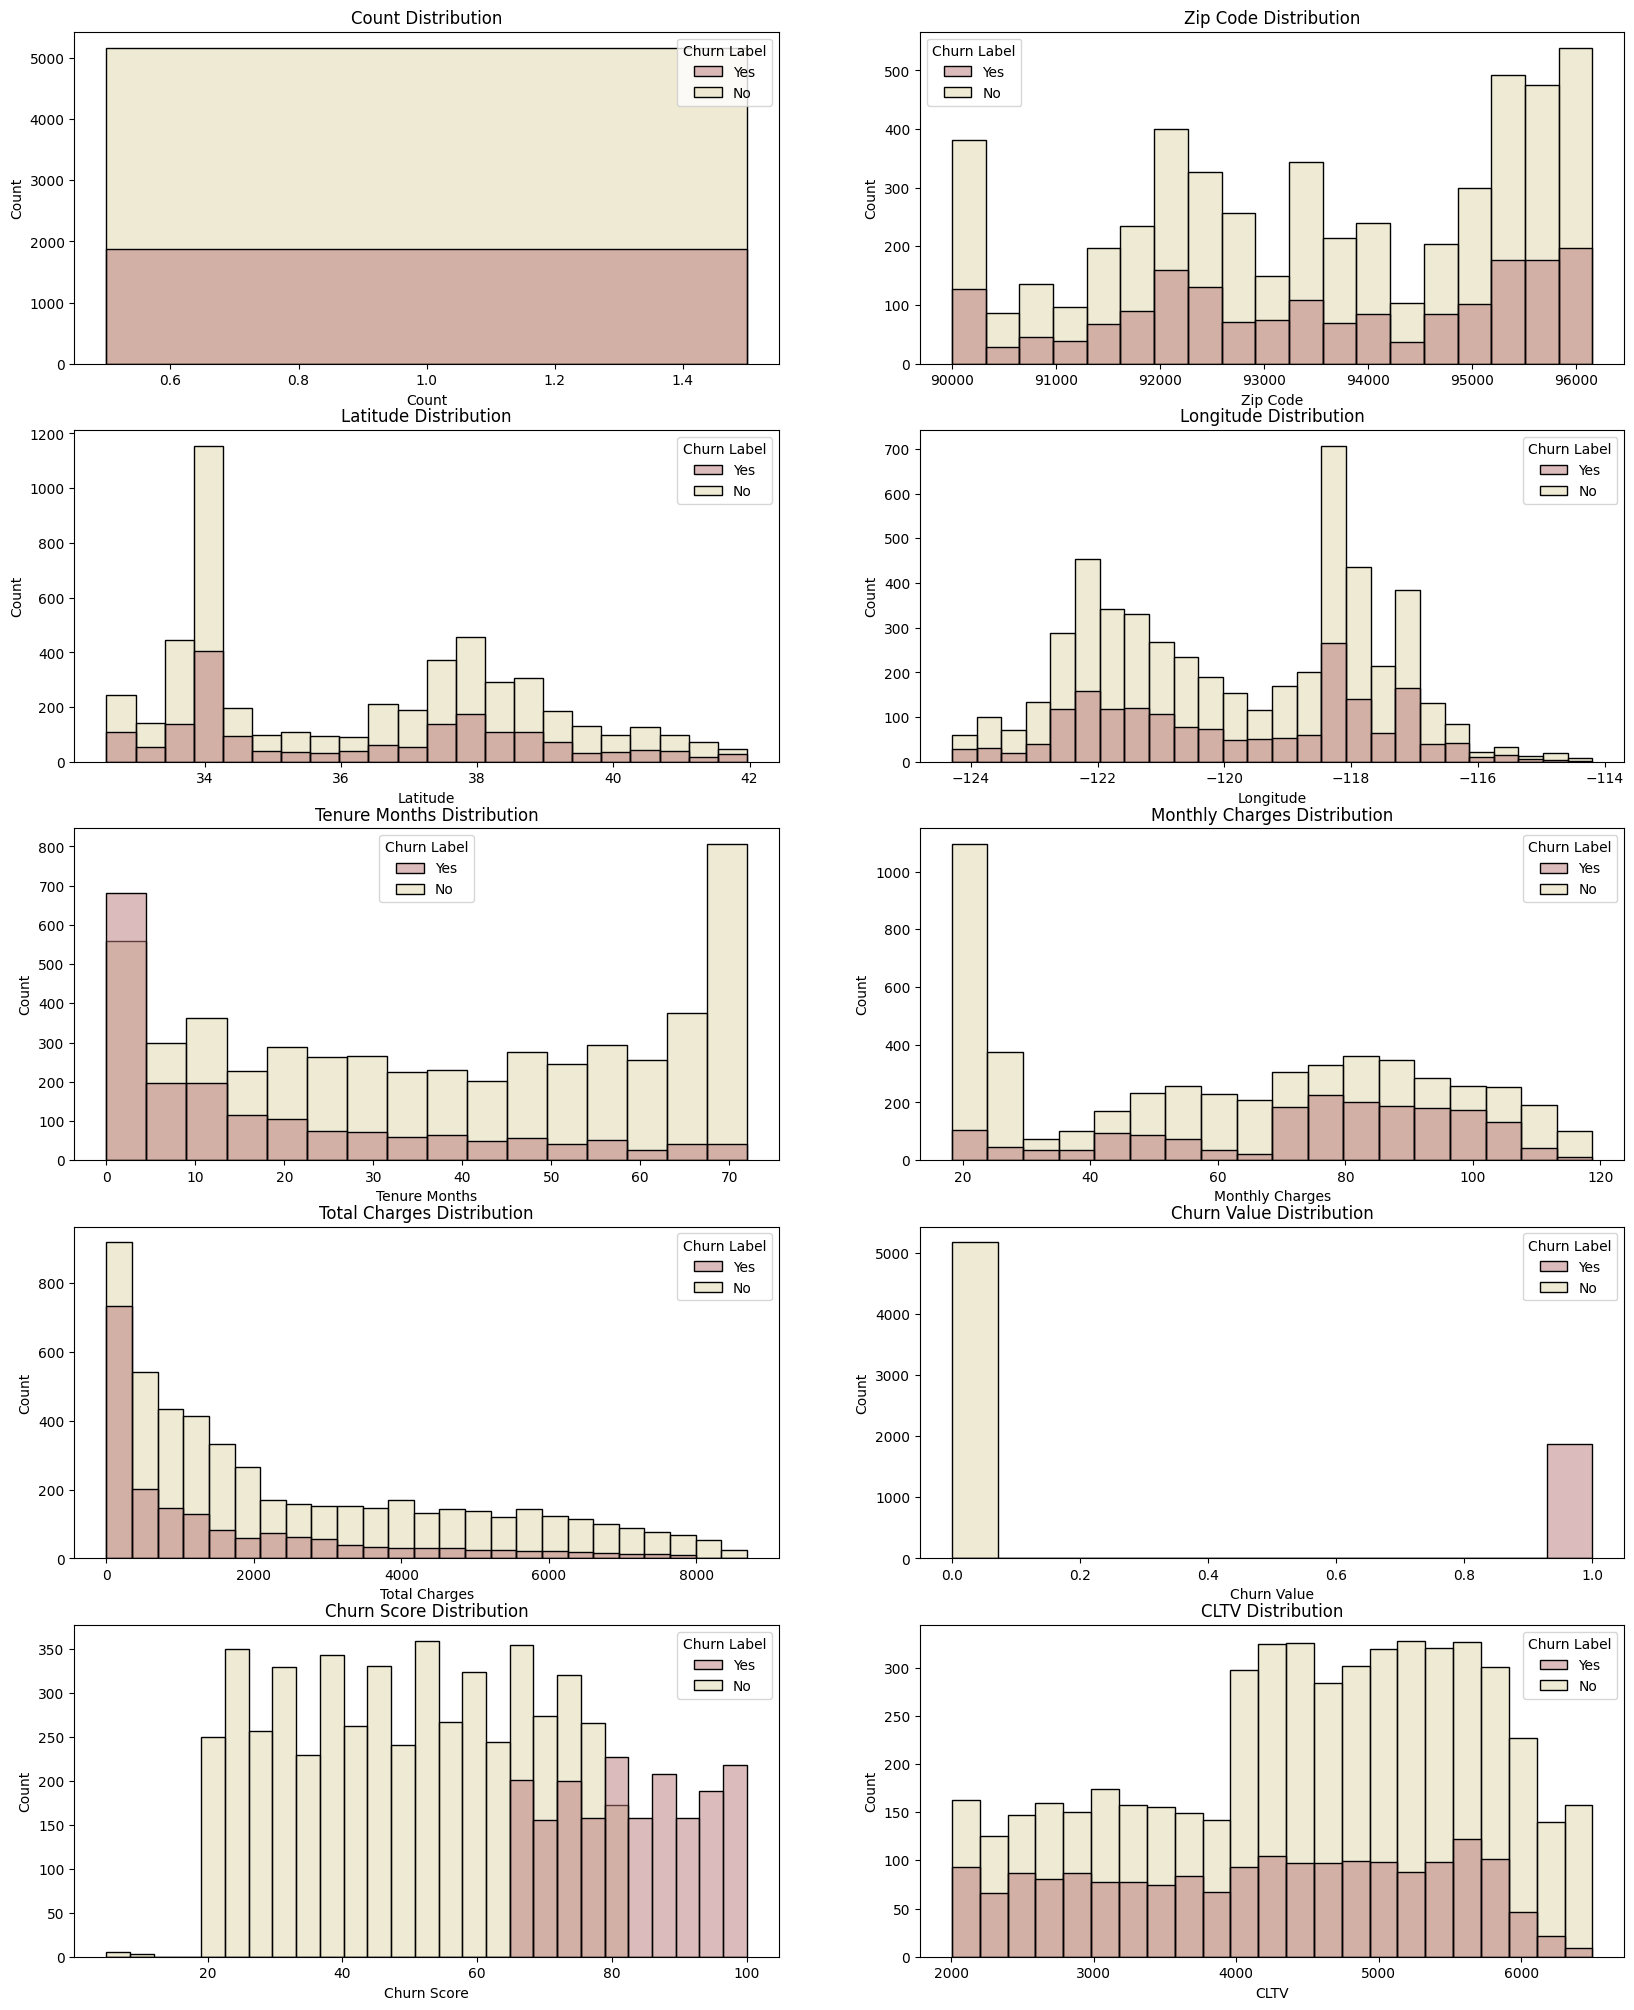

In [13]:
# plotting the distribution of numerical columns

fig, ax = plt.subplots(5, 2, figsize=(20, 25))

for i, feature in enumerate(num_cols):
    sns.histplot(data=df, x=feature,ax=ax[i//2, i%2], hue='Churn Label', palette='pink')
    ax[i//2, i%2].set_title(f'{feature} Distribution')

From the above plots, we can see that the columns Total Charges, Tenure Months, Churn Score and CLTV have significant impact of customers getting churned.

* As the Total Charges increases, the churn rate decreases.It seems customers who spent more money for the services are less likely to churn.
* As the Tenure Months increases, the churn rate decreases. It seems customers who are using the services for a long time are less likely to churn.
* As the CLTV increases, the churn count ratio decreases. It seems customers who have high CLTV are less likely to churn. So, the company should focus on  high CLTV customers.
* Customers whose churn score is high are more likely to churn.

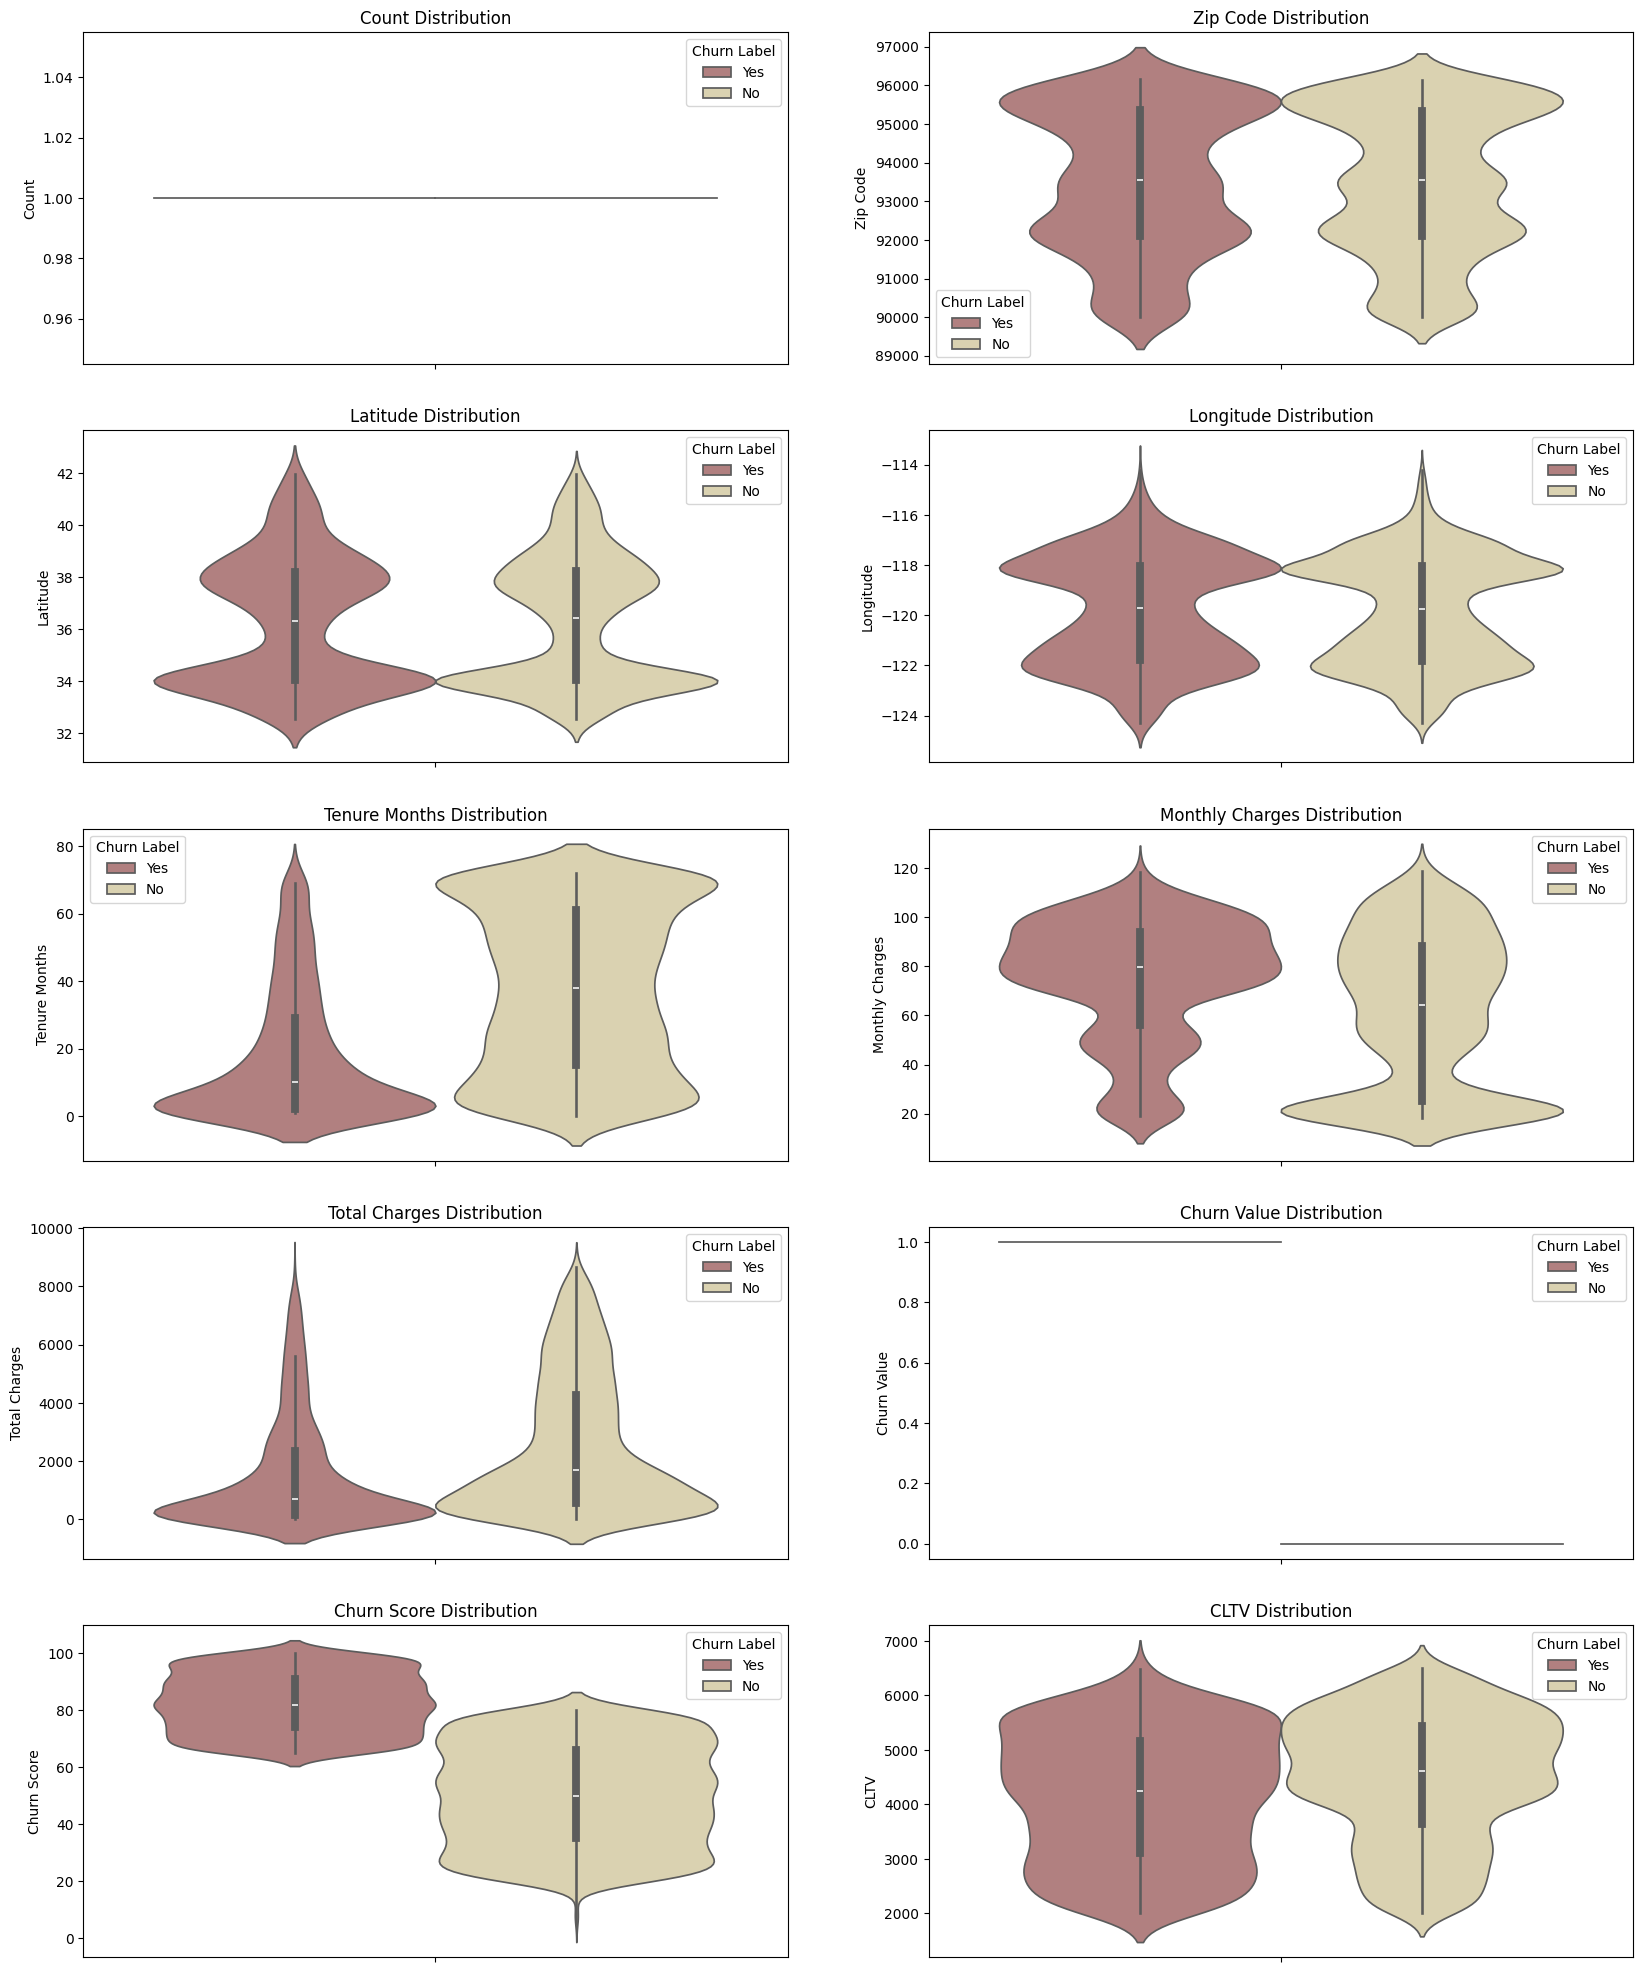

In [14]:
# plotting violin plots for numerical columns to check for outliers

fig, ax = plt.subplots(5, 2, figsize=(20, 25))

for i, feature in enumerate(num_cols):
    sns.violinplot(data=df, y =feature,ax=ax[i//2, i%2], hue='Churn Label', palette='pink')
    ax[i//2, i%2].set_title(f'{feature} Distribution')

From the above plots, we can see that there are no outliers in the numerical columns.

### Visualizing the Categorical Columns

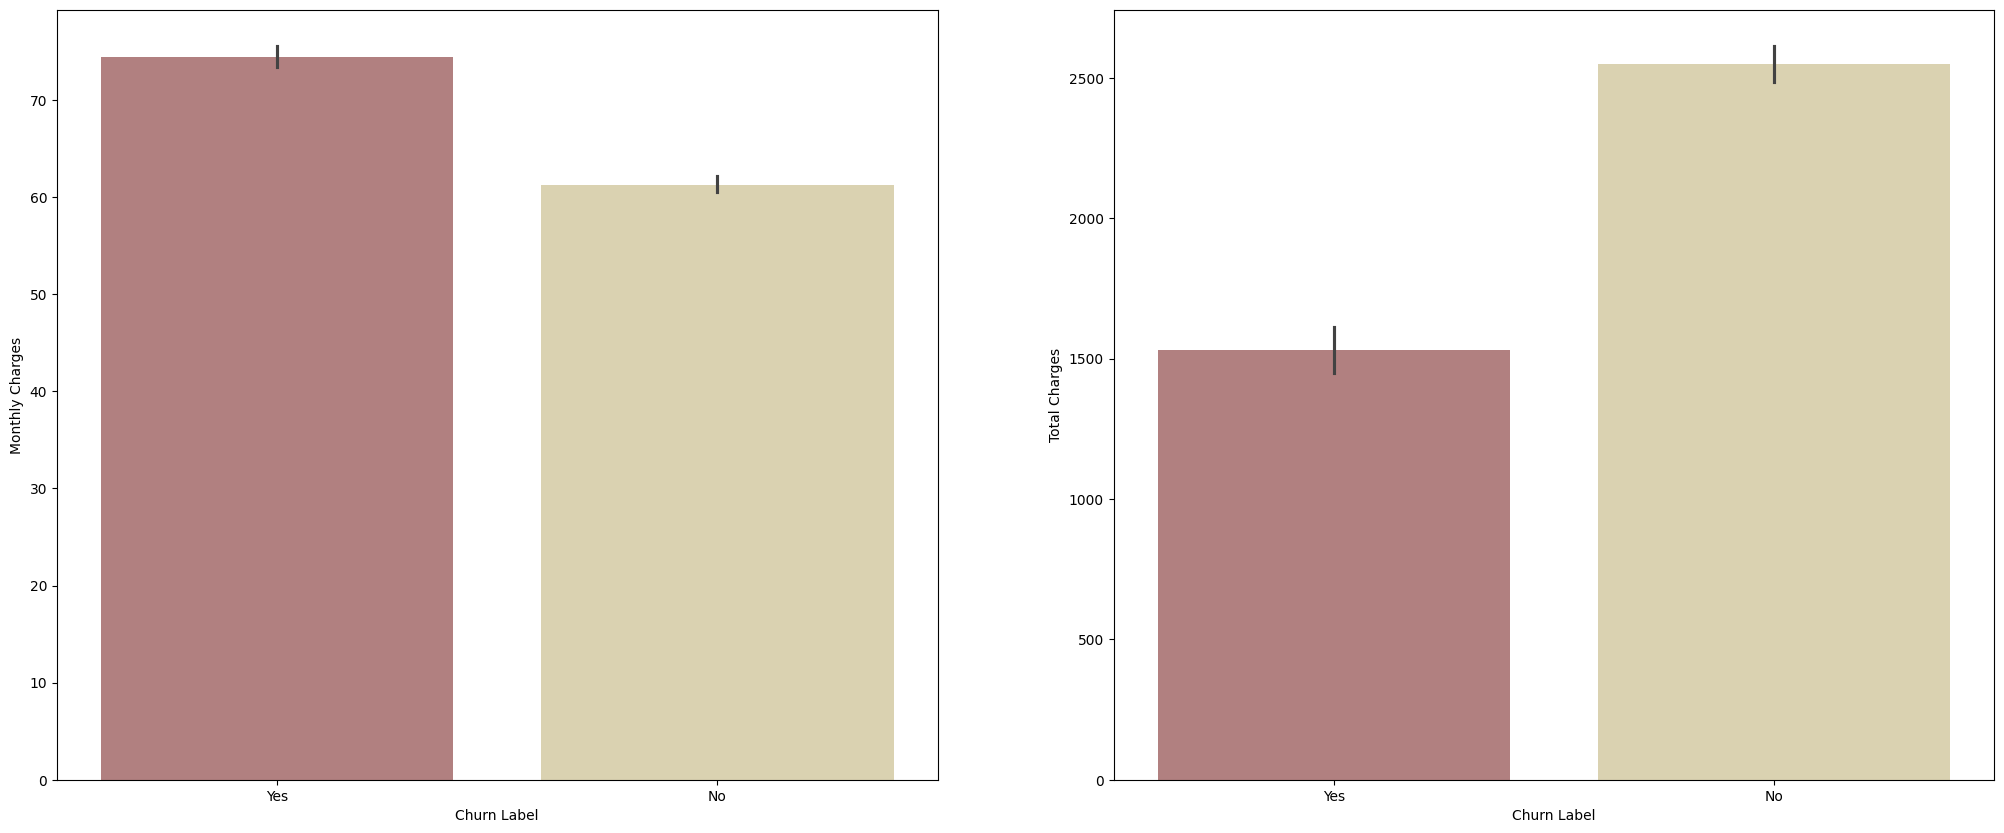

In [15]:
# plotting the Churn Label against the mean of Monthly Charges and Total Charges

fig, ax = plt.subplots(1, 2, figsize=(25,10))
sns.barplot(data=df, x='Churn Label', y='Monthly Charges', ax=ax[0], palette='pink', estimator='mean')
sns.barplot(data=df, x='Churn Label', y='Total Charges', ax=ax[1], palette='pink', estimator='mean')
plt.show()

The mean of the Total charges is greater for the customers who have not churned.It seems customers who spent more money for the services are less likely to churn.

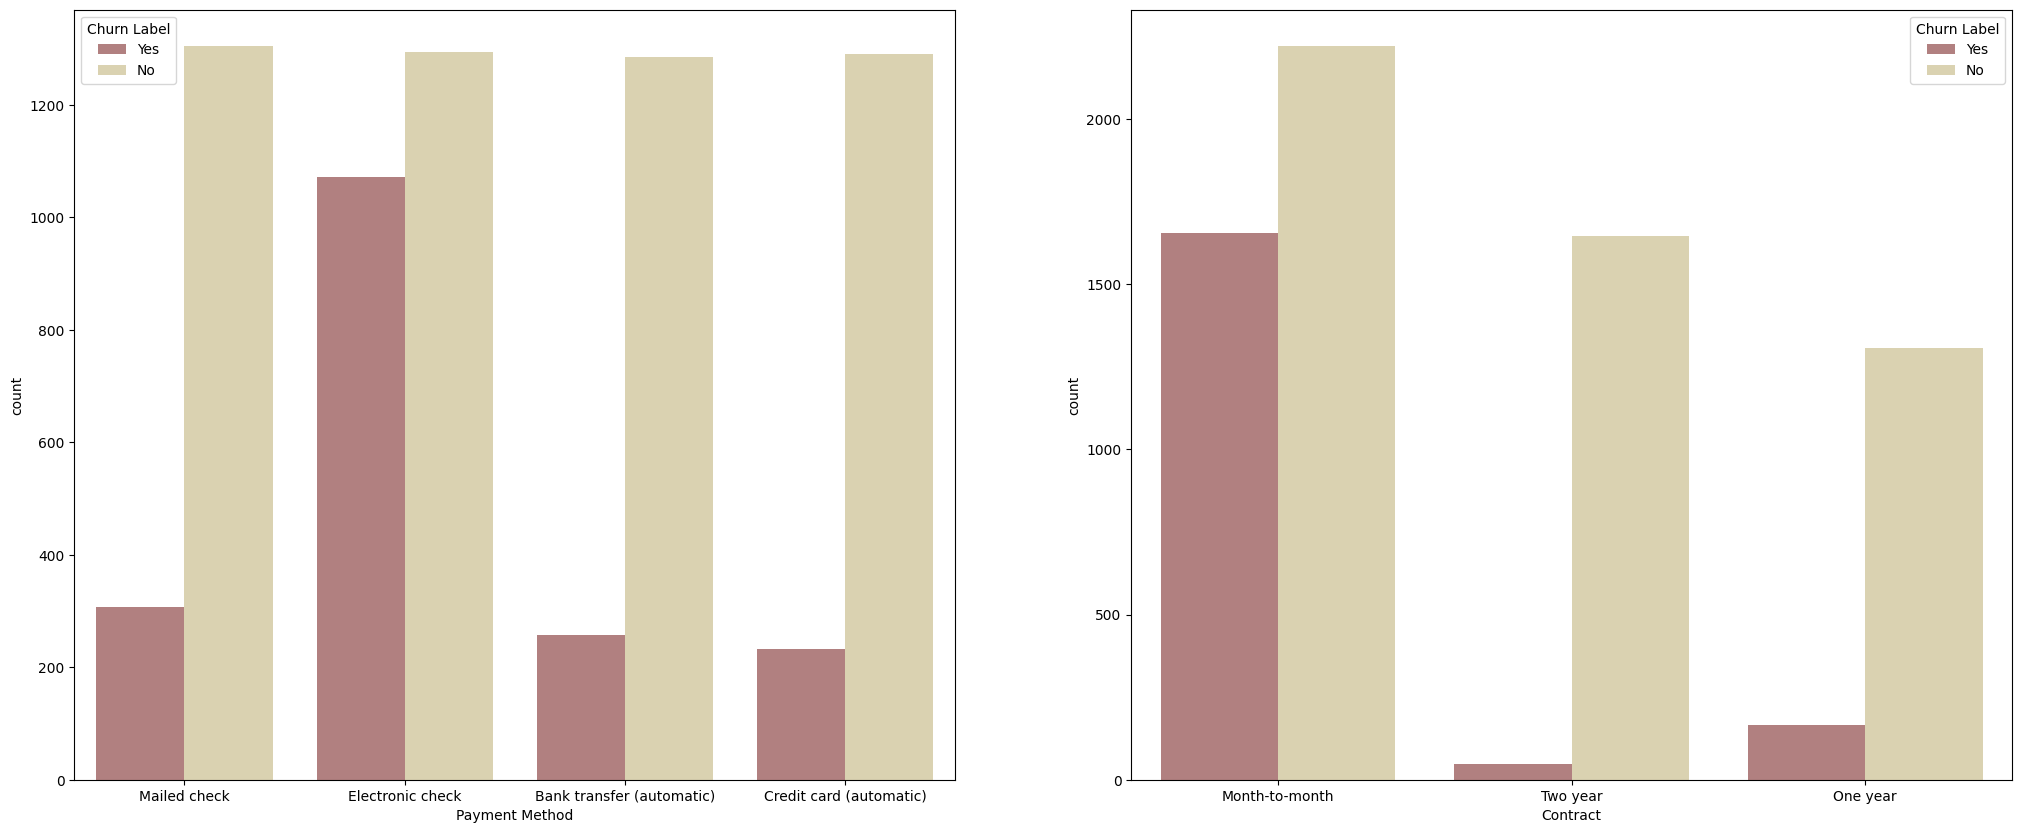

In [16]:
#plotting the countplot for payment method and contract with churn label as hue

fig, ax = plt.subplots(1, 2, figsize=(25,10))

sns.countplot(data=df, x='Payment Method', hue='Churn Label',ax = ax[0],  palette='pink')
sns.countplot(data=df, x='Contract', hue='Churn Label', ax = ax[1],palette='pink')
plt.show()

The Customers who have opted for electronic check payment method are more likely to churn and customers who have long contract period are less likely to churn.so, the company should focus on these customers to reduce the churn rate and offer long term plans with benifits to the customers.

([0, 1, 2], [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'No')])

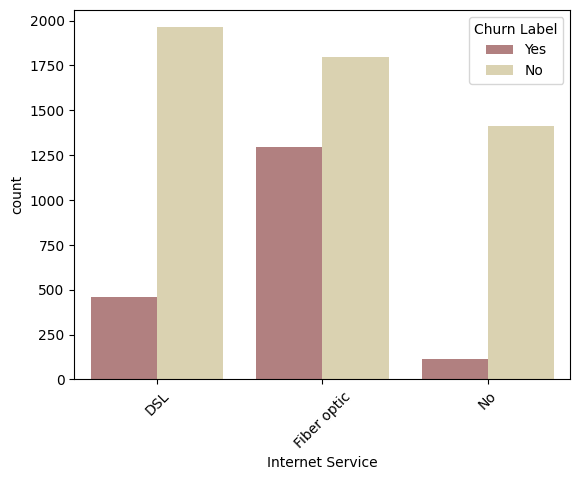

In [17]:
sns.countplot(data=df, x='Internet Service', hue='Churn Label',palette='pink')
plt.xticks(rotation=45)

Customers with optical fiber internet have the highest churn rate and the least churn rate by clients with no internet service.

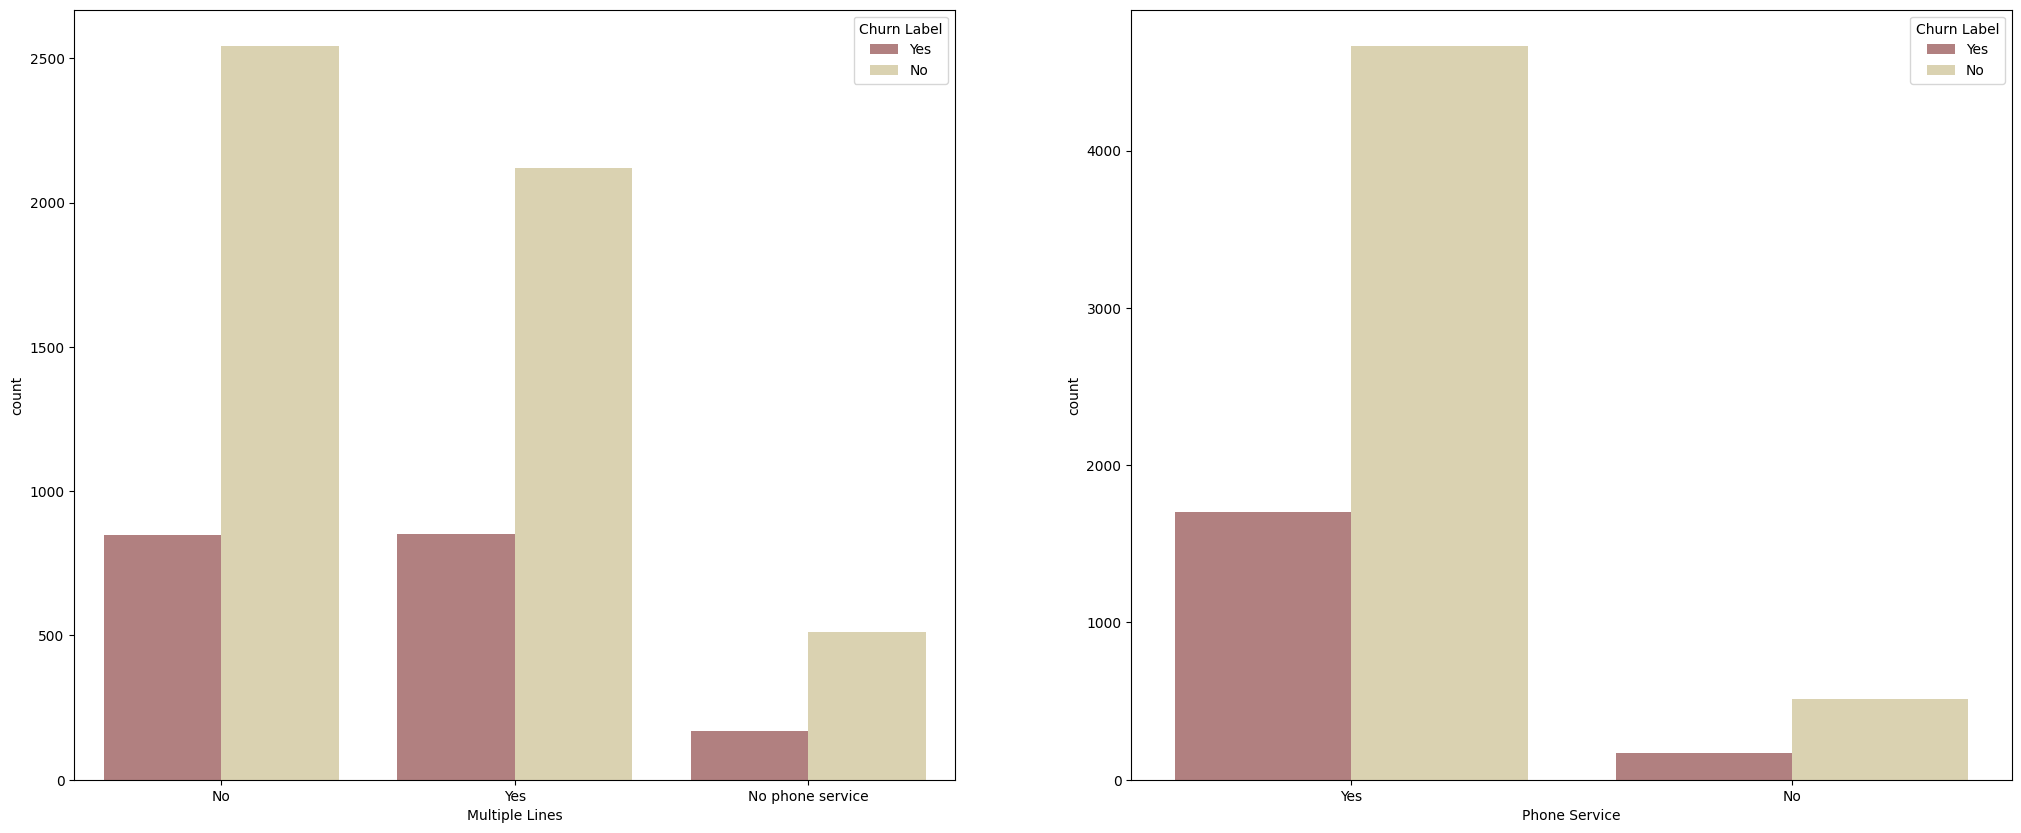

In [18]:
# countplot for Multiple Lines and Phone Service with Churn Label as hue
fig, ax = plt.subplots(1, 2, figsize=(25,10))

sns.countplot(data=df, x='Multiple Lines', hue='Churn Label',ax=ax[0],palette='pink')
sns.countplot(data=df, x='Phone Service', hue='Churn Label',ax=ax[1],palette='pink')
plt.show()

Customers who subscribed for the home phone services are less likely to churn due to the services provided by the company.

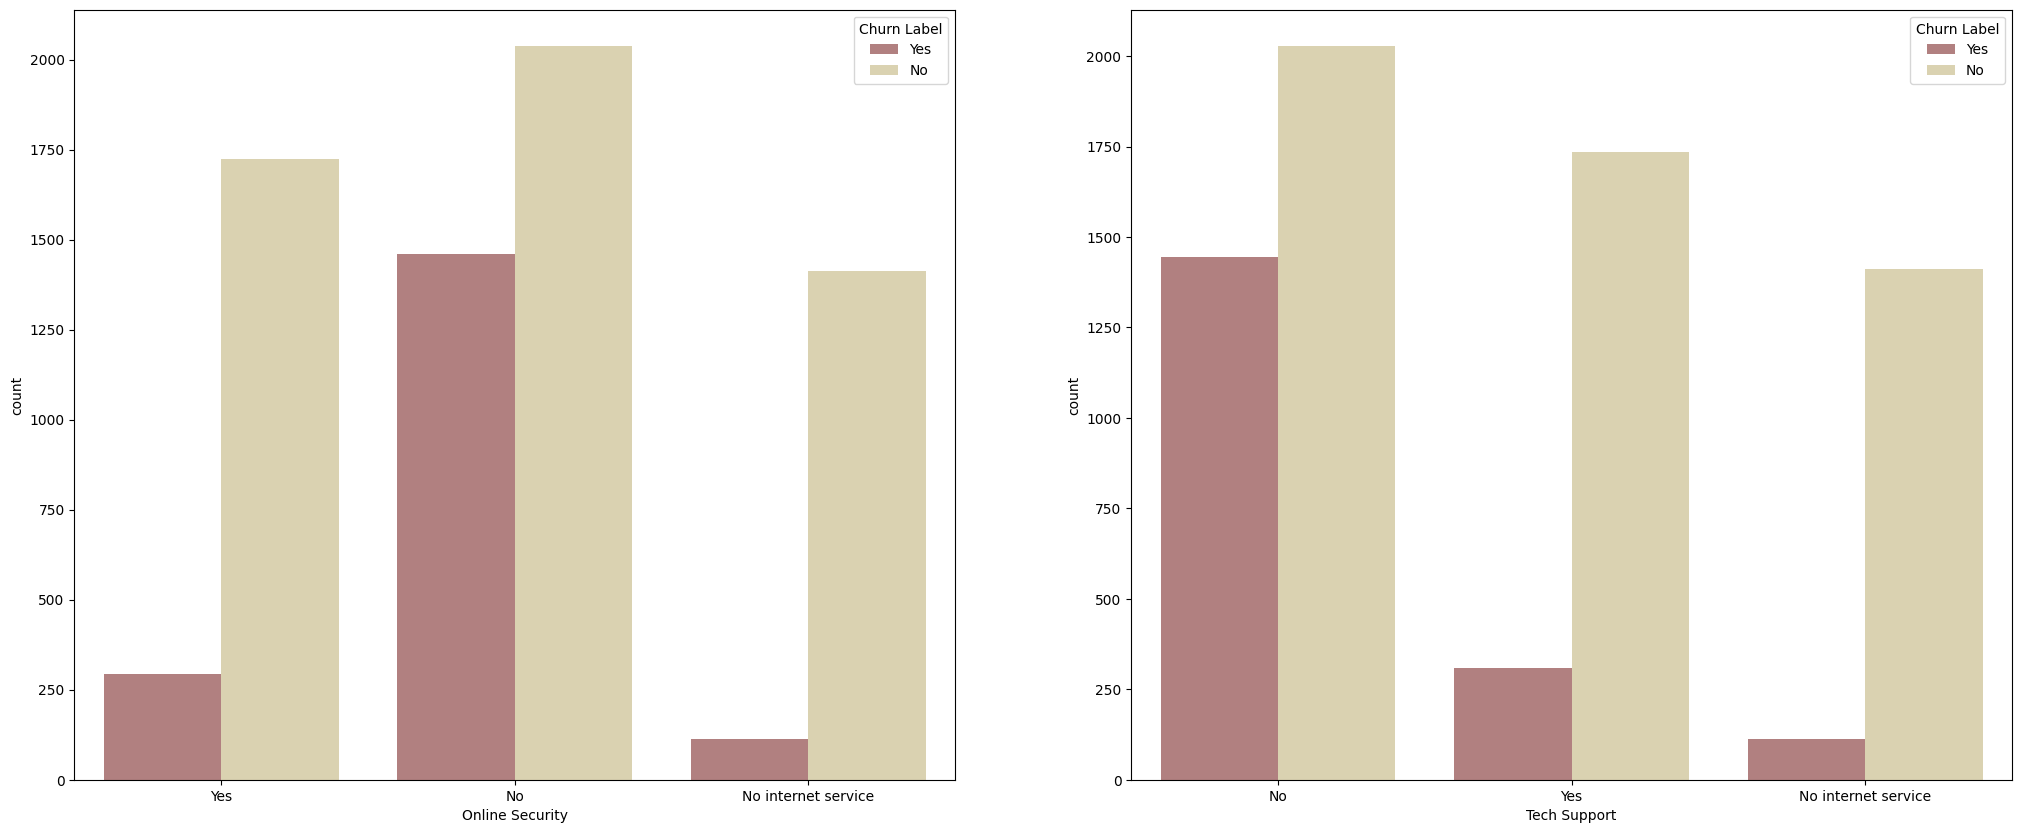

In [19]:
# countplot for Online Security and Tech support with Churn Label as hue
fig, ax = plt.subplots(1, 2, figsize=(25,10))
sns.countplot(data=df, x='Online Security', hue='Churn Label',ax=ax[0],palette='pink')
sns.countplot(data=df, x='Tech Support', hue='Churn Label',ax=ax[1],palette='pink')
plt.show()

customers who did not opted for the additional Online security and additional Tech support are more likely to churn.

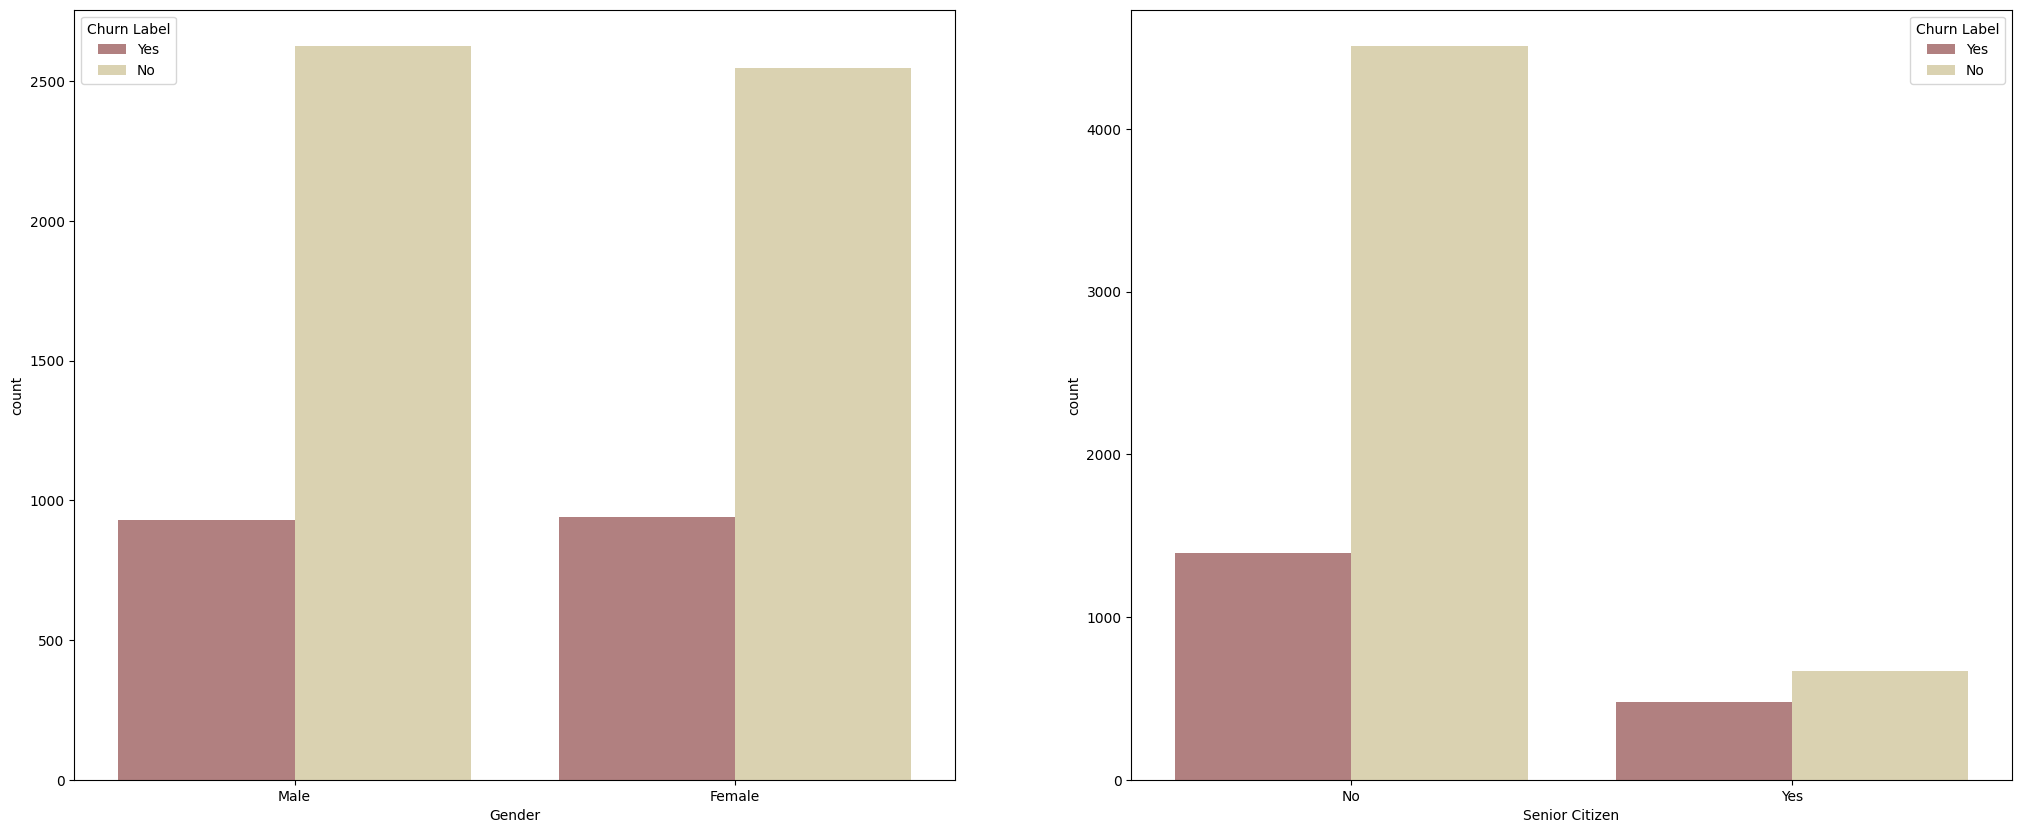

In [20]:
# countplot for Gender and Senior Citizen with Churn Label as hue
fig, ax = plt.subplots(1, 2, figsize=(25,10))
sns.countplot(data=df, x='Gender', hue='Churn Label',ax=ax[0],palette='pink')
sns.countplot(data=df, x='Senior Citizen', hue='Churn Label',ax=ax[1],palette='pink')
plt.show()

Gender doesn't seem to have much impact on the churn rate.And due to imbalanced senior citizen data column, it is difficult to draw the inferences based on senior citizen plot.

<Axes: xlabel='Dependents', ylabel='count'>

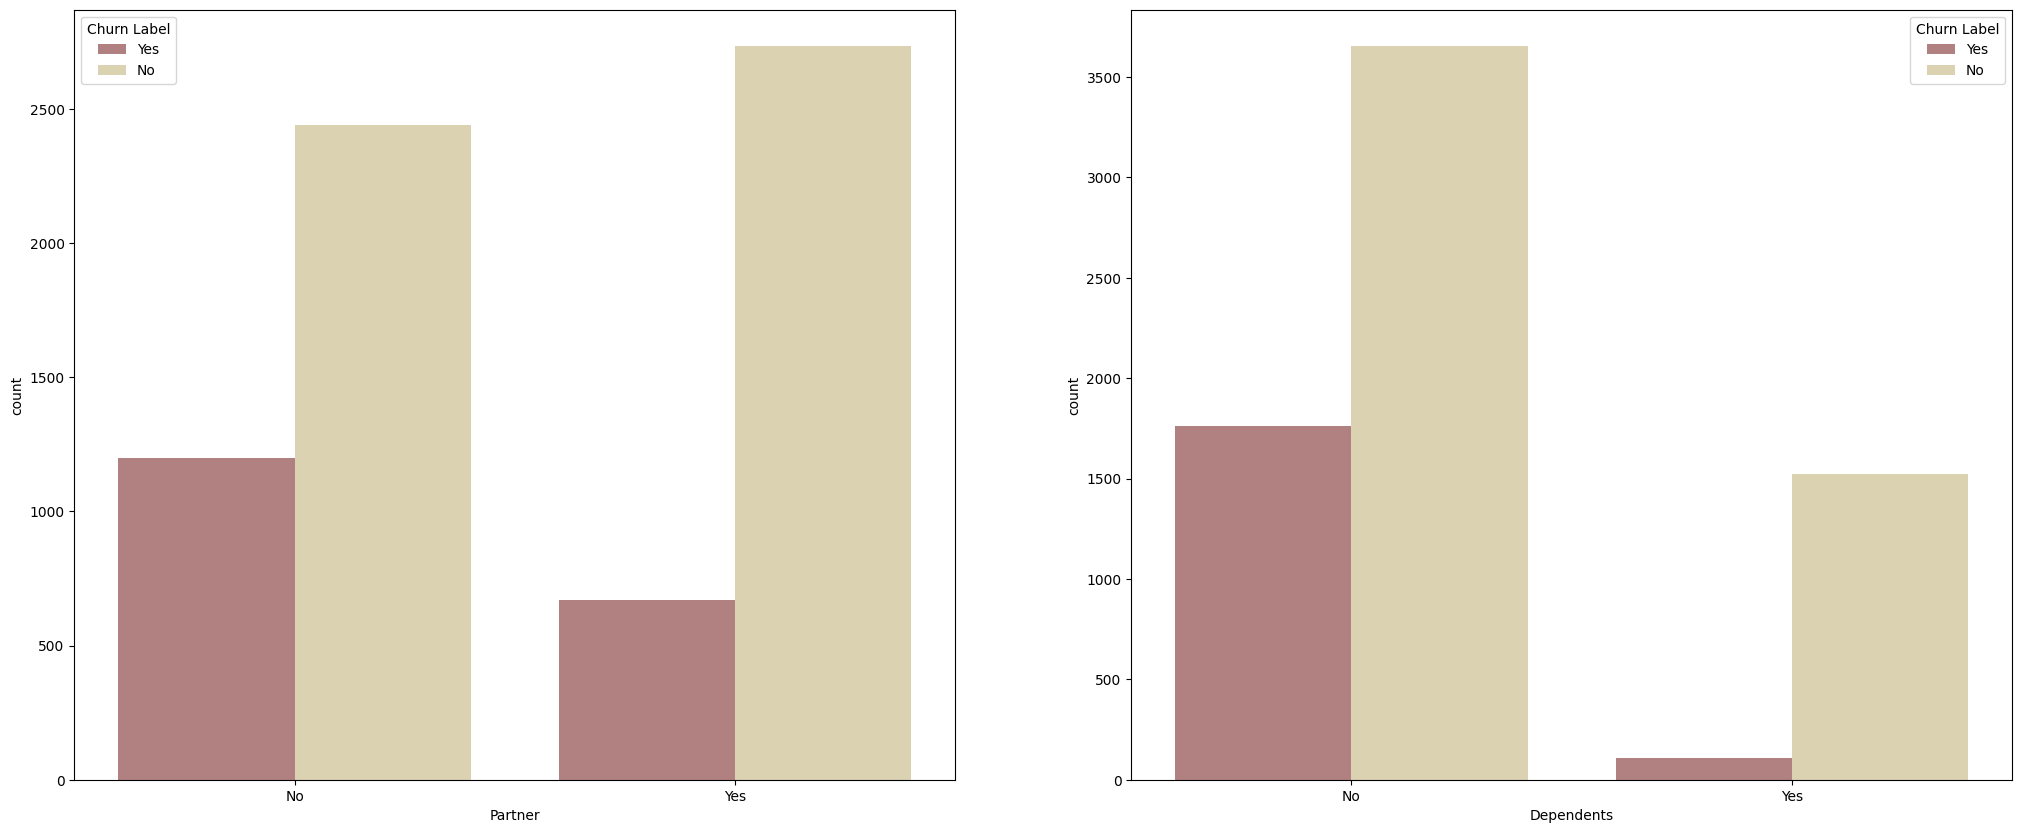

In [21]:
# countplot for Partner and Dependents with Churn Label as hue
fig, ax = plt.subplots(1, 2, figsize=(25,10))
sns.countplot(data=df, x='Partner', hue='Churn Label',ax=ax[0],palette='pink')
sns.countplot(data=df, x='Dependents', hue='Churn Label',ax=ax[1],palette='pink')

poeple who have partner or Dependents like family members are using the services to communicate with their family members and they are less likely to churn. 

In [22]:
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols

['Count',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

In [23]:
df['CLTV'].describe()

count    7043.000000
mean     4400.295755
std      1183.057152
min      2003.000000
25%      3469.000000
50%      4527.000000
75%      5380.500000
max      6500.000000
Name: CLTV, dtype: float64

### Customer Value segmentation

Segmenting Customers by Value, the Standard Approach used is the  ‘<b>Decile Analysis</b>’. This Calculates a Value Measure for each Customer,  sorts the Customer Base into Descending Order by Value and then Splits the Base into 10 Equal Segments. The First or Top Decile is the Top  10 Percent of the Base. The Second Decile is the next 10 per cent, and  so on.

 - Depending on the Decile Analysis of the Revenue Being Generated by the Customers.
 - These are the Customer's, who contribute Maximum Revenue to the Company.
 - Identifying, the Customers with High Risk of Getting into Churn, can help the Company.

In [24]:
df['preferences'] = pd.qcut(df['CLTV'], q = 10, labels = [i for i in range(10, 0, -1)])
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,preferences
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,8
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,9
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved,3
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,4
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,3


<Axes: xlabel='preferences', ylabel='Total Charges'>

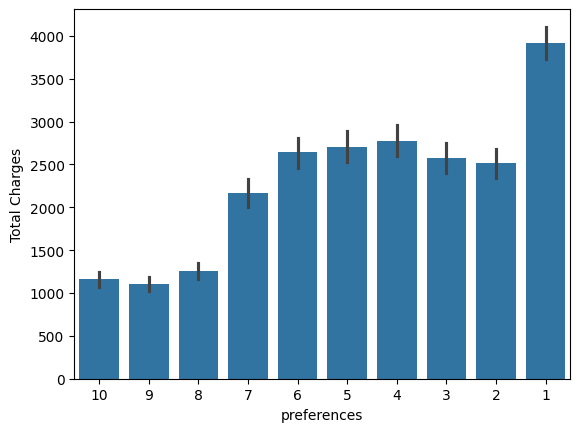

In [25]:
sns.barplot(df, x='preferences', y='Total Charges',estimator='mean')

* Higher preferences (lower numerical values like 1, 2, 3) tend to have higher total charges, while lower preferences (higher numerical values like 10, 9, 8) have lower total charges.

* There is  sudden drop in the total charges from 7th to 8th decile and 1st to 2nd decile.

In [26]:
df['preferences'] = pd.to_numeric(df['preferences'], errors='coerce')

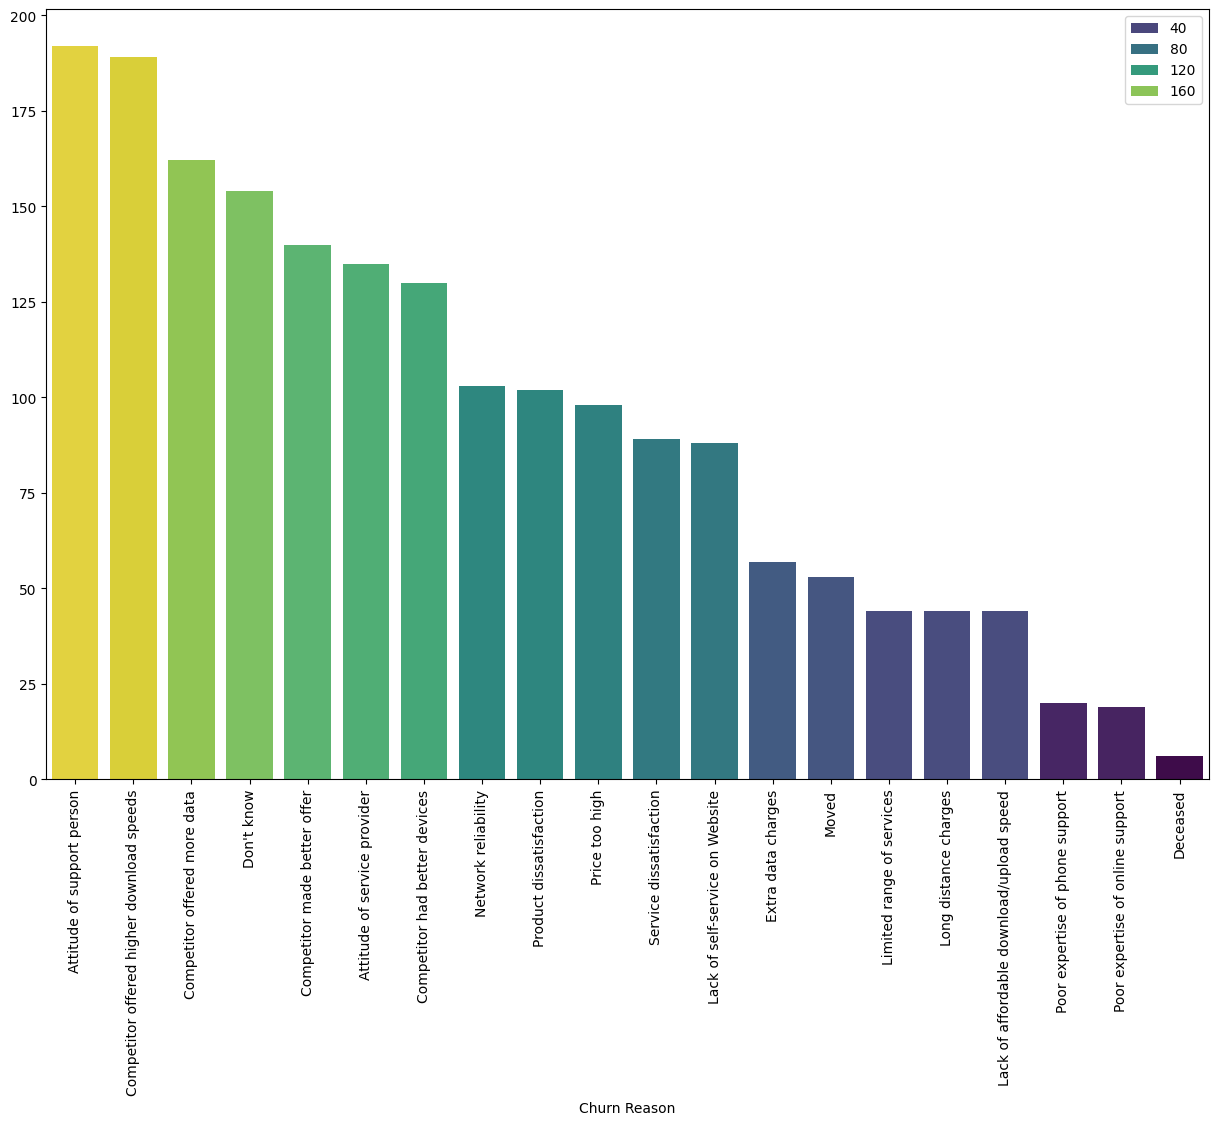

In [27]:
plt.figure(figsize=(15, 10))

values= df['Churn Reason'].value_counts(ascending=False).values
keys= df['Churn Reason'].value_counts(ascending=False).keys()

sns.barplot(x=keys, y=values, hue=values, palette='viridis')
plt.xticks(rotation=90)
plt.show()

The graph shows that churn reasons can be divided into two main categories:

* Internal : Internal churn reasons are those that are within the company's control, such as product quality, service quality, and price.
* external : External churn reasons are those that are outside of the company's control, such as competitor offerings and network reliability.

Actions that should to take:

* The focus should be on improving product and service quality, and reducing prices, in order to address the top three churn reasons.
* It is also important to improve customer support, as this is major churn driver.
* The company should monitor competitor offerings and network reliability, and make adjustments as needed.

In [28]:
# Group by 'City' and 'Churn Label' and count the occurrences
grouped = df.groupby(['City', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('City').transform('sum')
churn_rate = round(grouped / total_counts, 2)
City_ChurnLabel = pd.DataFrame({'churn_rate': churn_rate}).reset_index()

# Create a DataFrame with the total count per city
city_counts = df.groupby('City')['CustomerID'].count().reset_index()
city_counts.rename(columns={'CustomerID': 'count'}, inplace=True)

# Merge the City_ChurnLabel and city_counts DataFrames
City_ChurnLabel = City_ChurnLabel.merge(city_counts, on='City')

# Filter out the rows where 'Churn Label' is 'No' and sort dataframe by count
City_ChurnLabel = City_ChurnLabel[City_ChurnLabel['Churn Label'] == 'Yes']
City_ChurnLabel = City_ChurnLabel.sort_values(by='count', ascending=False)
City_ChurnLabel.drop(columns='Churn Label', inplace=True)

City_ChurnLabel.head()

,City,churn_rate,count
976,Los Angeles,0.30,305
1502,San Diego,0.33,150
1518,San Jose,0.26,112
1479,Sacramento,0.24,108
1508,San Francisco,0.30,104


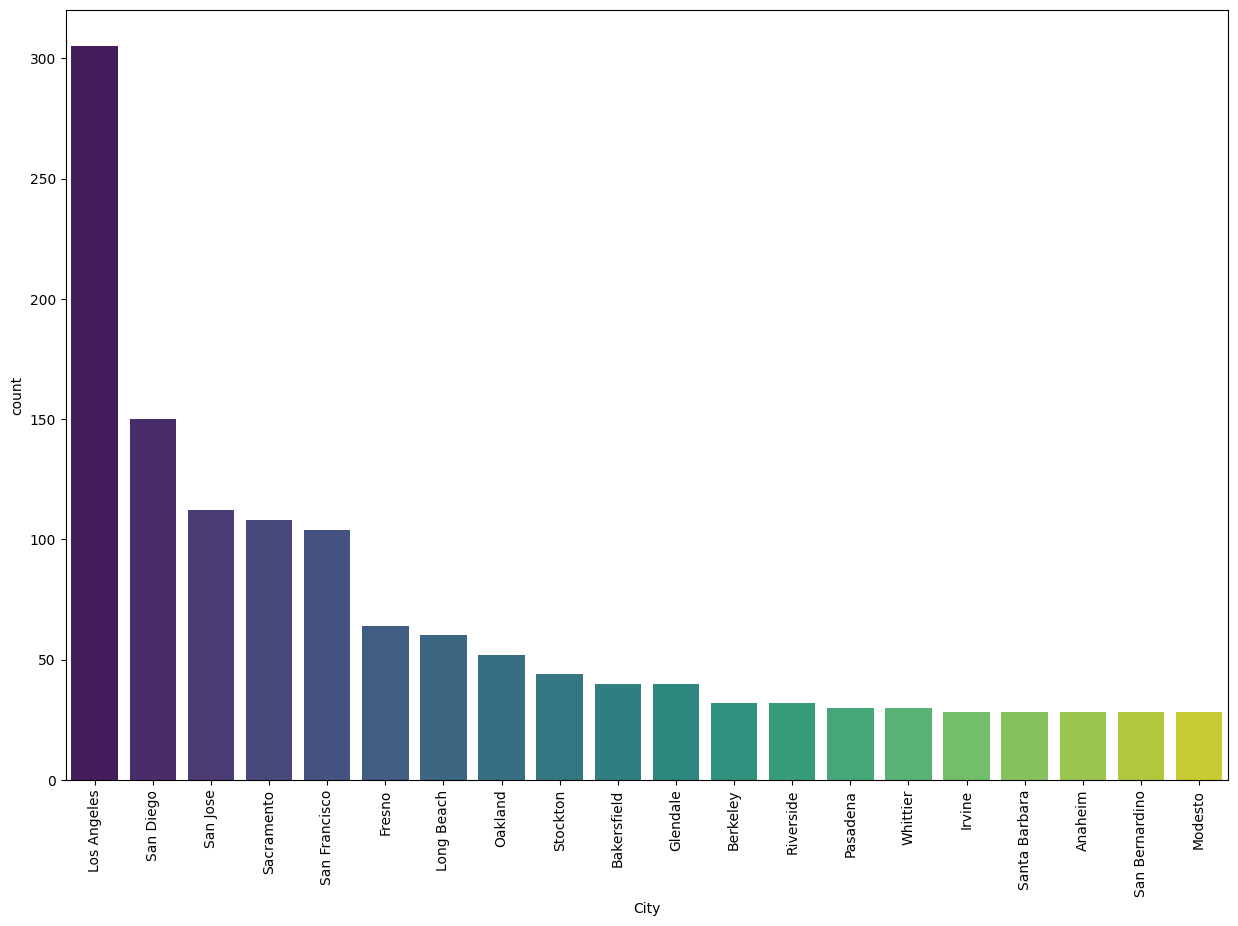

In [29]:
plt.figure(figsize=(15, 10))
sns.barplot(data=City_ChurnLabel.head(20), x='City', y='count', palette='viridis')
plt.xticks(rotation=90)
plt.show()

We see the largest number of customers in the Los Angeles counted 305, then San Diego counted 150.

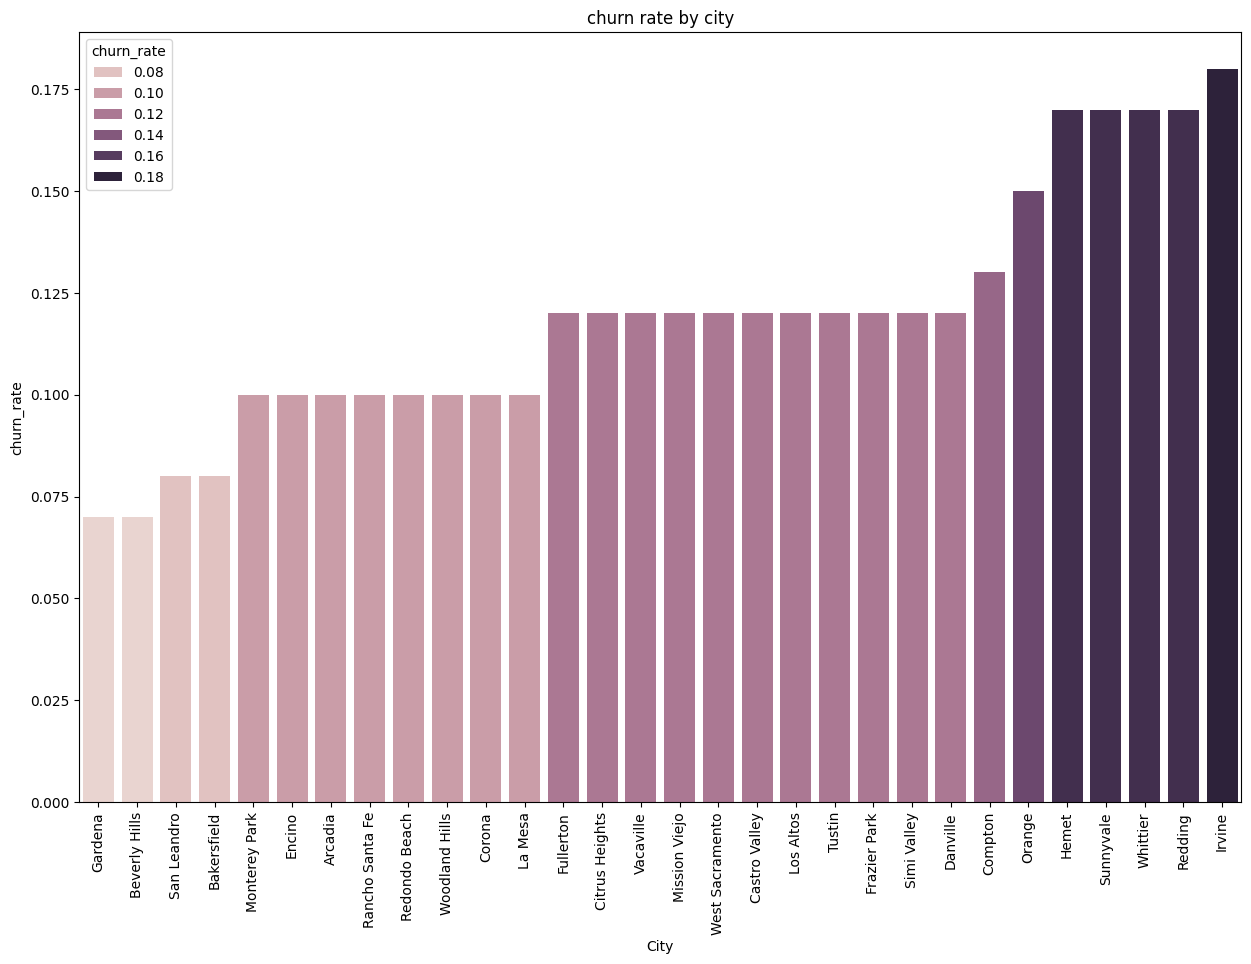

In [30]:
plt.figure(figsize=(15, 10))
sns.barplot(City_ChurnLabel.sort_values(by='churn_rate', ascending=True).head(30),
             x='City', y= 'churn_rate', hue='churn_rate')
plt.title('churn rate by city')
plt.xticks(rotation=90)
plt.show()

In [31]:
# Group by Latitude', 'Longitude' and 'Churn Label' and count the occurrences
grouped = df.groupby(['Latitude','Longitude', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby(['Latitude','Longitude']).transform('sum')
churn_rate = round(grouped / total_counts, 2)
loc_ChurnLabel = pd.DataFrame({'churn_rate': churn_rate}).reset_index()

# Create a DataFrame with the total count 
loc_counts = df.groupby(['Latitude','Longitude'])['CustomerID'].count().reset_index()
loc_counts.rename(columns={'CustomerID': 'count'}, inplace=True)

# Merge the City_ChurnLabel and city_counts DataFrames
loc_ChurnLabel = loc_ChurnLabel.merge(loc_counts, on=['Latitude','Longitude'])

# Filter out the rows where 'Churn Label' is 'No' and sort dataframe by count
loc_ChurnLabel = loc_ChurnLabel[loc_ChurnLabel['Churn Label'] == 'Yes']
loc_ChurnLabel = loc_ChurnLabel.sort_values(by='count', ascending=False)
loc_ChurnLabel.drop(columns='Churn Label', inplace=True)

loc_ChurnLabel.head()

,Latitude,Longitude,churn_rate,count
1,32.555828,-117.040073,0.2,5
672,34.038983,-117.991372,0.6,5
698,34.050198,-118.210946,0.2,5
696,34.049841,-118.338460,0.2,5
690,34.048013,-118.293953,0.2,5


In [32]:
fig = px.scatter_mapbox(loc_ChurnLabel,
                        lat="Latitude", lon='Longitude',
                        hover_data= ['count'], mapbox_style='open-street-map',
                        color="count",
                        width=1000, height=800, zoom=5, title='Count by location'
        )
fig.write_html("churn_map1.html")



[View the Interactive Count Map](https://allmight05.github.io/EDA-Project/churn_map1.html)

* The count of the customers in the cities is not uniform, so the company should focus on the cities with the highest number of customers to reduce the churn rate.
* From the plot we can see that the count is more at the bottom left cities in the plot.

In [33]:
fig = px.scatter_mapbox(loc_ChurnLabel,
                        lat="Latitude", lon='Longitude',
                        hover_data= ['churn_rate'], mapbox_style='open-street-map',
                        color="churn_rate",
                        width=1000, height=800, zoom=5, title='Churn rate by location'
        )
fig.write_html("churn_map2.html")

[View the Interactive Churn Map](https://allmight05.github.io/EDA-Project/churn_map2.html)


It seems churn rate is uniform across all cities from the plot.

### Conclusion and Mitigation Measures

#### Conclusion:
1. **Total Charges and Tenure Months**: Customers with higher total charges and longer tenure months are less likely to churn. This indicates that loyal customers who spend more are more satisfied with the services.
2. **CLTV**: Customers with higher Customer Lifetime Value (CLTV) are less likely to churn. The company should focus on retaining these high-value customers.
3. **Payment Method and Contract**: Customers who use electronic check as a payment method and those with shorter contract periods are more likely to churn. 
4. **Internet Service**: Customers with optical fiber internet have the highest churn rate, while those with no internet service have the lowest churn rate.
5. **Additional Services**: Customers who did not opt for additional services like Online Security and Tech Support are more likely to churn.
6. **Demographics**: Gender does not have a significant impact on churn rate, but customers with partners or dependents are less likely to churn.
7. **Geographical Analysis**: The churn rate is uniform across cities, but the count of customers is higher in certain cities like Los Angeles and San Diego.

#### Mitigation Measures:
1. **Loyalty Programs**: Implement loyalty programs to reward long-term customers and those with higher total charges. This can include discounts, exclusive offers, or loyalty points.
2. **Customer Engagement**: Increase engagement with high CLTV customers through personalized communication and offers to ensure they feel valued.
3. **Flexible Payment Options**: Offer more flexible and convenient payment options to reduce churn among customers using electronic checks.
4. **Long-term Contracts**: Encourage customers to opt for longer contract periods by offering incentives such as discounts or additional benefits.
5. **Service Quality Improvement**: Focus on improving the quality of optical fiber internet services to reduce churn among these customers.
6. **Additional Services**: Promote additional services like Online Security and Tech Support through targeted marketing campaigns to increase their adoption.
7. **Customer Support**: Enhance customer support to address issues promptly and effectively, reducing churn due to service-related problems.
8. **Geographical Focus**: Focus retention efforts on cities with the highest number of customers, such as Los Angeles and San Diego, to maximize impact.

By implementing these measures, the company can reduce churn rates and improve customer satisfaction and retention.